In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('booking_train_set.csv')

In [3]:
df.drop(['index'],axis=1,inplace = True);

In [4]:
#  Are certain destinations more popular in certain months?

In [7]:
# Convert to datetime

df['checkin'] = df['checkin'].apply(lambda x: pd.to_datetime(x))
df['checkout'] = df['checkout'].apply(lambda x: pd.to_datetime(x))

# Get Month
df['Month'] = df['checkin'].apply(lambda x: x.month)

In [9]:
# Get Labels for Cities

df["city_id"] = df["city_id"].astype('category')
df["cityLabel"] = df["city_id"].cat.codes

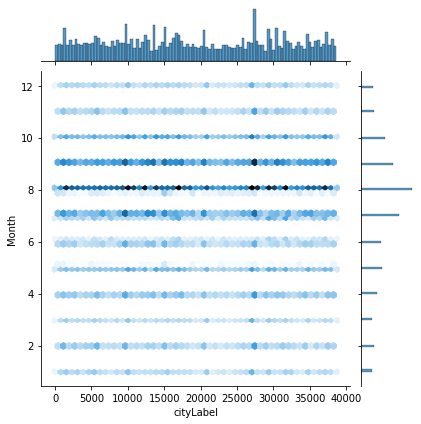

In [12]:
sns.jointplot(x='cityLabel', y='Month', data=df, kind='hex')

Month 7,8 and 9 (July, August and September) seem to particulary dense suggesting they are the most busiest period for holidays. It is not clear if particular destinations are more popular for certain months as the data is not ordered. 

In [30]:
month_city = pd.crosstab(df.Month,df.cityLabel)
month_city.head()

cityLabel  0      1      2      3      4      5      6      7      8      \
Month                                                                      
1              0      0      0      0      1      2      1      0      0   
2              0      0      0      0      2      0      0      0      0   
3              0      0      0      0      1      0      0      0      0   
4              0      0      1      0      4      0      1      0      0   
5              0      0      0      0      3      0      0      2      0   

cityLabel  9      ...  38628  38629  38630  38631  38632  38633  38634  38635  \
Month             ...                                                           
1              0  ...      1      0      0      0      1      0     15      0   
2              0  ...      0      0      0      0      0      0     13      1   
3              0  ...      0      0      0      0      0      0      4      0   
4              0  ...      0      0      0      0      0      0      8      0   
5              0  ...      1      0      0      0      0      0      3      0   

cityLabel  38636  38637  
Month                    
1              1      0  
2              1      0  
3              0      0  
4              0      0  
5              0      0  

[5 rows x 38638 columns]

In [59]:
month_city[2]

Month
1     0
2     0
3     0
4     1
5     0
6     5
7     7
8     5
9     0
10    0
11    0
12    0
Name: 2, dtype: int64

In [60]:
temp_arr = []
for i in range(38638):
    temp_arr.append(round((month_city[i]*month_city.index).sum()/month_city[i].sum()))
print(temp_arr)

[12, 8, 7, 7, 7, 1, 6, 7, 7, 8, 4, 8, 9, 9, 12, 10, 6, 8, 9, 7, 10, 8, 7, 7, 7, 7, 8, 8, 7, 8, 4, 7, 8, 8, 6, 8, 8, 7, 8, 8, 10, 6, 9, 7, 6, 9, 8, 9, 8, 8, 8, 5, 10, 8, 8, 5, 8, 10, 10, 8, 9, 6, 5, 8, 7, 9, 7, 7, 4, 5, 2, 4, 8, 9, 6, 9, 5, 7, 7, 8, 7, 8, 6, 8, 8, 7, 7, 8, 9, 7, 8, 3, 9, 9, 7, 6, 6, 7, 6, 8, 8, 8, 7, 8, 8, 7, 7, 8, 6, 7, 7, 8, 10, 9, 7, 4, 2, 8, 8, 8, 10, 9, 6, 7, 3, 2, 11, 6, 7, 7, 8, 9, 5, 4, 8, 12, 7, 8, 7, 1, 8, 8, 6, 7, 8, 8, 6, 6, 7, 9, 8, 5, 7, 5, 7, 7, 7, 7, 8, 5, 5, 6, 7, 10, 7, 10, 8, 7, 10, 7, 10, 6, 7, 10, 6, 7, 7, 9, 9, 8, 8, 7, 8, 9, 6, 5, 5, 7, 7, 10, 6, 10, 6, 9, 7, 7, 10, 8, 7, 7, 8, 8, 9, 7, 6, 5, 8, 7, 8, 8, 8, 8, 9, 8, 7, 8, 1, 9, 10, 8, 8, 7, 10, 6, 9, 6, 9, 4, 8, 8, 9, 5, 6, 8, 9, 10, 11, 7, 9, 8, 8, 9, 8, 8, 7, 7, 7, 5, 6, 8, 8, 7, 5, 5, 7, 12, 9, 7, 6, 8, 7, 10, 7, 7, 9, 8, 7, 10, 9, 6, 8, 8, 8, 3, 7, 8, 11, 8, 7, 3, 6, 7, 6, 9, 10, 6, 5, 10, 4, 7, 8, 9, 9, 7, 8, 7, 7, 8, 8, 7, 8, 6, 8, 6, 11, 9, 7, 7, 6, 8, 8, 6, 6, 8, 8, 7, 8, 7, 7, 7, 8, 7, 8,

In [70]:
d = {x:temp_arr.count(x) for x in temp_arr}
temp = pd.Series(d)
temp.sort_index()

1       336
2       519
3       528
4      1224
5      2006
6      5425
7     11316
8     11567
9      2898
10     1700
11      627
12      492
dtype: int64

In [71]:
month_city.sum(axis=1)

Month
1      44928
2      53902
3      44429
4      63724
5      83464
6      82149
7     151211
8     205123
9     127477
10     95591
11     50577
12     46000
dtype: int64

The above demonstrates that certain cities are most popular in certain months. In months 7 and 8 this may not be as useful as there are many possible destinations but for the other months it may be helpful in deciding cities. The skew fits the skew of the data, which is still not to unbalanced. Thus, this will be a useful feature in classifying the data. 